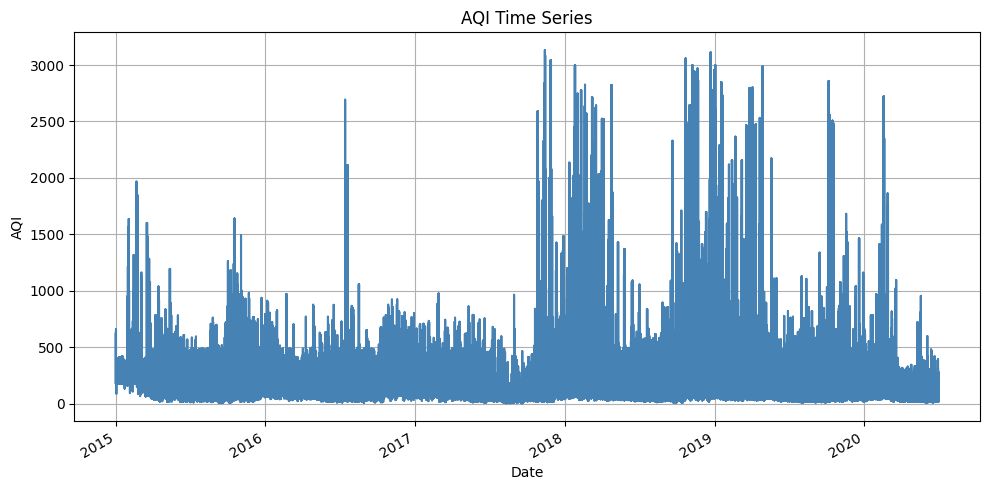

c:\Users\Vidhi\Desktop\AQI_final\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Vidhi\Desktop\AQI_final\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Vidhi\Desktop\AQI_final\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MemoryError: Unable to allocate 109. MiB for an array with shape (7, 2038313) and data type float64

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the dataset
df = pd.read_csv('../data_clean/filtered_dataset.csv')  # Update the path as needed

# Step 2: Preprocess Date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.sort_values('Date', inplace=True)

# Step 3: Set Date as index for time series modeling
df.set_index('Date', inplace=True)

# Step 4: Select target variable (univariate time series)
ts = df['AQI'].dropna()

# Optional: Plot AQI over time
plt.figure(figsize=(10, 5))
ts.plot(color='steelblue')
plt.title('AQI Time Series')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Train-Test Split (time series aware)
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Step 6: Fit ARIMA Model (manually specify order or use auto_arima for tuning)
# Order = (p,d,q), here using (5,1,2) as a basic example
model = ARIMA(train, order=(5, 1, 2))
model_fit = model.fit()

# Step 7: Forecast
y_pred = model_fit.forecast(steps=len(test))

# Step 8: Evaluation
mae = mean_absolute_error(test, y_pred)
mse = mean_squared_error(test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test, y_pred)

print("\n📈 ARIMA Evaluation Metrics:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual AQI', color='navy')
plt.plot(test.index, y_pred, label='Predicted AQI (ARIMA)', color='orange')
plt.title('ARIMA Forecast: Actual vs Predicted AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Save the ARIMA model
joblib.dump(model_fit, 'arima_model.pkl')
print("\n✅ ARIMA model saved as 'arima_model.pkl'")
